In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
data = pd.read_csv('./train.csv').to_numpy()

In [42]:
np.random.shuffle(data)

m, n = data.shape

In [43]:
data_dev = data[:1000].T
Y_dev = data_dev[0].astype(int)
X_dev = data_dev[1:n] / 255.0

data_train = data[1000:m].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:n] / 255.0

In [44]:
print("Train shape:", X_train.shape, "Labels:", Y_train.shape)

Train shape: (784, 41000) Labels: (41000,)


In [45]:
def init_params():
    w1 = np.random.randn(10, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((10, 1))
    w2 = np.random.randn(10, 10) * np.sqrt(2 / 10)
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

def ReLu(z):
    return np.maximum(0, z)

def softmax(z):
    z = z - np.max(z, axis=0, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

def deriv_Relu(z):
    return z > 0

def back_prop(z1, a1, z2, a2, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = (1/m) * dz2.dot(a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * deriv_Relu(z1)
    dw1 = (1/m) * dz1.dot(x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2

def update_params(dw1, db1, dw2, db2, w1, b1, w2, b2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2

In [46]:
def get_predictions(a2):
    return np.argmax(a2, axis=0)

def get_accuracy(predictions, y):
    return np.mean(predictions == y)

def compute_loss(a2, y):
    m = y.size
    log_likelihood = -np.log(a2[y, np.arange(m)] + 1e-9)
    return np.sum(log_likelihood) / m

In [47]:
def gradient_descent(x, y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_params(dw1, db1, dw2, db2, w1, b1, w2, b2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(a2)
            accuracy = get_accuracy(predictions, y)
            loss = compute_loss(a2, y)
            print(f"Iteration {i}: Accuracy = {accuracy:.4f}, Loss = {loss:.4f}")

    return w1, b1, w2, b2

In [57]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 2000, 0.01)

Iteration 0: Accuracy = 0.1351, Loss = 2.3728
Iteration 10: Accuracy = 0.1511, Loss = 2.2791
Iteration 20: Accuracy = 0.1677, Loss = 2.2264
Iteration 30: Accuracy = 0.1884, Loss = 2.1814
Iteration 40: Accuracy = 0.2154, Loss = 2.1348
Iteration 50: Accuracy = 0.2463, Loss = 2.0840
Iteration 60: Accuracy = 0.2836, Loss = 2.0290
Iteration 70: Accuracy = 0.3315, Loss = 1.9731
Iteration 80: Accuracy = 0.3711, Loss = 1.9203
Iteration 90: Accuracy = 0.3994, Loss = 1.8712
Iteration 100: Accuracy = 0.4240, Loss = 1.8251
Iteration 110: Accuracy = 0.4460, Loss = 1.7814
Iteration 120: Accuracy = 0.4685, Loss = 1.7396
Iteration 130: Accuracy = 0.4898, Loss = 1.6994
Iteration 140: Accuracy = 0.5091, Loss = 1.6603
Iteration 150: Accuracy = 0.5269, Loss = 1.6221
Iteration 160: Accuracy = 0.5429, Loss = 1.5849
Iteration 170: Accuracy = 0.5558, Loss = 1.5485
Iteration 180: Accuracy = 0.5685, Loss = 1.5129
Iteration 190: Accuracy = 0.5805, Loss = 1.4782
Iteration 200: Accuracy = 0.5917, Loss = 1.4444
Ite

In [59]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, X_data, Y_data, W1, b1, W2, b2):
    # Extract single sample (column vector)
    current_image = X_data[:, index, None]
    
    # Model prediction
    prediction = make_predictions(current_image, W1, b1, W2, b2)[0]
    label = Y_data[index]
    
    print(f"🧠 Prediction: {prediction}")
    print(f"✅ Actual Label: {label}")
    
    # Reshape and scale back to 0–255 for visualization
    current_image = (X_data[:, index].reshape(28, 28) * 255).astype(np.uint8)
    
    plt.figure(figsize=(3,3))
    plt.imshow(current_image, cmap='gray', interpolation='nearest')
    plt.title(f"Predicted: {prediction} | Actual: {label}")
    plt.axis('off')
    plt.show()


🧠 Prediction: 7
✅ Actual Label: 7


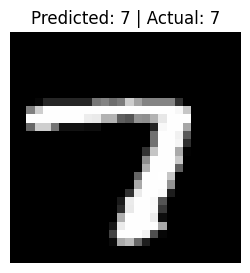

In [71]:
test_prediction(3, X_dev, Y_dev, w1, b1, w2, b2)

In [72]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

np.float64(0.854)